In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
data = pd.read_csv('C:/Users/85260/Desktop/retail sales raw data.csv')

In [3]:
data.head()

,CCYY,MM,M3M,DTRADE,STRADE,TRADE,STAT_VAR,STAT_VALUE,Trade name,Date
0,2004,NaN,NaN,NaN,NaN,NaN,VALUE,NaN,ALL,Annual
1,2004,10.0,NaN,NaN,NaN,NaN,VALUE,15831.0,ALL,10/1/2004
2,2004,10.0,NaN,NaN,NaN,2.0,VALUE,1889.0,Food,10/1/2004
3,2004,10.0,NaN,NaN,NaN,3.0,VALUE,513.0,Food_Livestock,10/1/2004
4,2004,10.0,NaN,NaN,NaN,4.0,VALUE,181.0,Food_Fruits,10/1/2004


## Retail sales Data analysis

First, using data at the annual levelUp to 2018, what trade is the largest contributor to Hong Kong’s retail sales
market? Why do you think it is the case?

What happened to the total retail sales value in 2019? What trade
contributed to such change?

What happened to the total retail sales value in 2020? What trade
contributed to such change? More specifically, which trade had the worst
and which trade had the best performance? Why do you think it is the case?

## Data cleaning 

For data cleaning, output the unique value of trade name for more visualization.

In [4]:
#Lets check about the array of each trade
industry = data['Trade name'].unique()
industry

array(['ALL', 'Food', 'Food_Livestock', 'Food_Fruits', 'Food_Pastry',
       'Food_others', 'Food_Alcohol', 'Supermarkets', 'Fuels', 'Clothing',
       'Clothing_Wearing', 'Clothing_Footwear', 'Consumer durables',
       'Consumer durables_motor vehicles',
       'Consumer durables_furniture fixtures', 'Department stores',
       'Jewellery', 'Others', 'Others_Books', 'Others_Herbs',
       'Others_Opticals', 'Others_MC', 'Others_Others', 'SM & SDS',
       'Consumer durables_eletrical goods nec'], dtype=object)

In [5]:
#combie to 8 industry 
data['industry'] = data['Trade name'].str.rsplit("_", n=-1, expand=True)[0]
data['industry']

0                     ALL
1                     ALL
2                    Food
3                    Food
4                    Food
              ...        
4912               Others
4913               Others
4914               Others
4915             SM & SDS
4916    Consumer durables
Name: industry, Length: 4917, dtype: object

In [6]:
#replace SM & SDS to supermarket
data['industry'] = data['industry'].str.replace('SM & SDS', 'Supermarkets')
data['industry'].unique()

array(['ALL', 'Food', 'Supermarkets', 'Fuels', 'Clothing',
       'Consumer durables', 'Department stores', 'Jewellery', 'Others'],
      dtype=object)

In [7]:
data1 = data[data['Trade name'] != 'ALL']
industry = data1['industry'].unique()

Since we need to find the data up to 2018, we need to make a new dataframe only include 2004 - 2018 year data.

In [8]:
data1 =  data1.loc[(data['CCYY'] <= 2018)]
data1

,CCYY,MM,M3M,DTRADE,STRADE,TRADE,STAT_VAR,STAT_VALUE,Trade name,Date,industry
2,2004,10.0,NaN,NaN,NaN,2.0,VALUE,1889.0,Food,10/1/2004,Food
3,2004,10.0,NaN,NaN,NaN,3.0,VALUE,513.0,Food_Livestock,10/1/2004,Food
4,2004,10.0,NaN,NaN,NaN,4.0,VALUE,181.0,Food_Fruits,10/1/2004,Food
5,2004,10.0,NaN,NaN,NaN,5.0,VALUE,460.0,Food_Pastry,10/1/2004,Food
6,2004,10.0,NaN,NaN,NaN,6.0,VALUE,559.0,Food_others,10/1/2004,Food
...,...,...,...,...,...,...,...,...,...,...,...
4285,2018,12.0,NaN,NaN,NaN,38.0,VALUE,284.0,Others_Opticals,12/1/2018,Others
4286,2018,12.0,NaN,NaN,NaN,39.0,VALUE,4376.0,Others_MC,12/1/2018,Others
4287,2018,12.0,NaN,NaN,NaN,40.0,VALUE,3642.0,Others_Others,12/1/2018,Others
4288,2018,12.0,NaN,NaN,NaN,49.0,VALUE,5074.0,SM & SDS,12/1/2018,Supermarkets


## largest contributor to Hong Kong’s retail sales market  level up to 2018


First we need to check the datatype for the variable. 

In [9]:
data1.dtypes

CCYY            int64
MM            float64
M3M           float64
DTRADE        float64
STRADE        float64
TRADE         float64
STAT_VAR       object
STAT_VALUE    float64
Trade name     object
Date           object
industry       object
dtype: object

We able to use the industry total we make before and do a simaple pie chart for understanding the industry % of retail sales.

In [10]:
#value sum by industry
industrytotal = pd.Series(data1.groupby(['industry'])['STAT_VALUE'].sum())
industrytotal

industry
Clothing             1383543.0
Consumer durables    1713216.0
Department stores     550640.0
Food                  945048.0
Fuels                 123527.0
Jewellery             972821.0
Others               2016285.0
Supermarkets         1259568.0
Name: STAT_VALUE, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

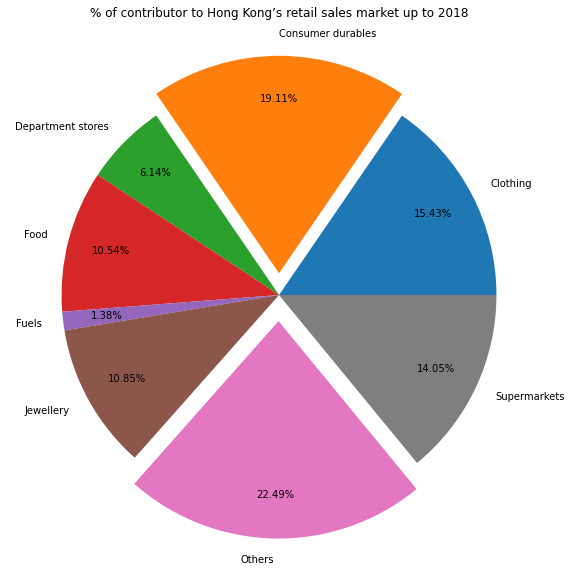

In [11]:
plt.figure(figsize=(10,10))

explode = (.0,.1,.0,.0,.0,.0,.12,.0)
plt.pie(industrytotal, labels = industrytotal.index, autopct='%.2f%%' , pctdistance = 0.8,
        explode = explode)
plt.title("% of contributor to Hong Kong’s retail sales market up to 2018")

plt.show




From the above pie chart, We about to know that beside others, consumer durables are the second largerst contributor to Hong Kong up to 2018. And we can see the trade  contributor by using the trade name for fruther investigation.


In [12]:
#sum the trade totall by their name up to 2018
tradestotal = data1.groupby(['Trade name'],as_index = False)['STAT_VALUE'].sum()
tradestotal


,Trade name,STAT_VALUE
0,Clothing,691767.0
1,Clothing_Footwear,99119.0
2,Clothing_Wearing,592657.0
3,Consumer durables,856604.0
4,Consumer durables_eletrical goods nec,563010.0
5,Consumer durables_furniture fixtures,95316.0
6,Consumer durables_motor vehicles,198286.0
7,Department stores,550640.0
8,Food,472521.0
9,Food_Alcohol,67797.0


After group by trade name, we can find the yop five largest sales using the trade name.

In [13]:
tr = tradestotal.nlargest(5, 'STAT_VALUE')
tr

,Trade name,STAT_VALUE
16,Others,1008137.0
15,Jewellery,972821.0
3,Consumer durables,856604.0
0,Clothing,691767.0
22,SM & SDS,661404.0


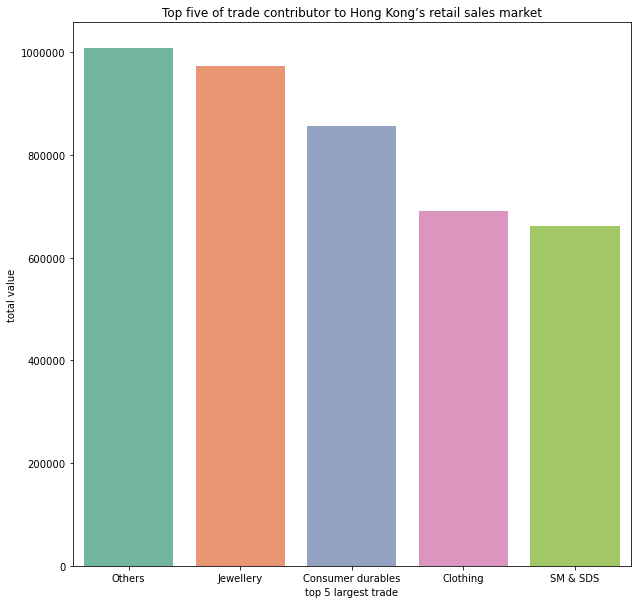

In [14]:
%matplotlib inline 
plt.figure(figsize=(10,10))
labels = tr['Trade name']
values = tr['STAT_VALUE']

sns.barplot(x = labels,y = values, palette='Set2')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('total value')
plt.xlabel('top 5 largest trade')
plt.title("Top five of trade contributor to Hong Kong’s retail sales market")
plt.show()


For the aboove bar chart, we can see up to 2020, beside others, jewellery and consumer durables is luxury goods,
and the smsds mostly is selling necessity goods. And the clothing are both luxury and necessity depends on the customer.
But the most important result we able to know from this graph, from 2004 to 2018, the market is luxury goods oriented market. 

Since we have the data till 2020, we able to see the 2020 value by the trade and filter top 5 sales.

In [15]:
values2020 = data.loc[(data['CCYY']== 2020) & (data['Trade name']!= 'ALL') ]
values2020  
industrytotal2020 = values2020.groupby(['Trade name'])['STAT_VALUE'].agg('sum').reset_index()


tr1 = industrytotal2020.nlargest(5, 'STAT_VALUE')
tr1

,Trade name,STAT_VALUE
22,SM & SDS,66112.0
16,Others,65409.0
23,Supermarkets,58494.0
3,Consumer durables,57108.0
8,Food,37391.0


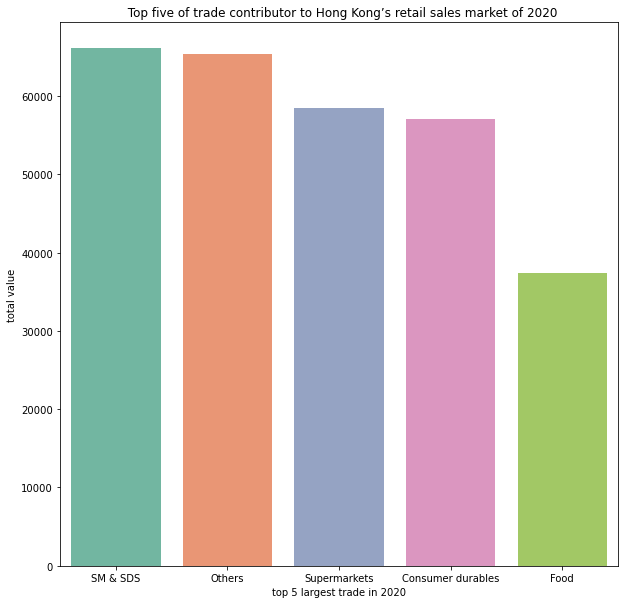

In [16]:
%matplotlib inline 
plt.figure(figsize=(10,10))
labels = tr1['Trade name']
values = tr1['STAT_VALUE']

sns.barplot(x = labels,y = values, palette='Set2')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('total value')
plt.xlabel('top 5 largest trade in 2020')
plt.title("  Top five of trade contributor to Hong Kong’s retail sales market of 2020")
plt.show()

For the above graph, we able to know that from 2020 Top 5 inculde sm & sds, supermarkets and food which is mostly sell for necessity goods.  luxury goods consumer durables can climb to top 5 list. which make the market become necessity goods oriented market.

Then we able to looking for the data from total retail ales by year and see the trend and do the fruther analysis.

In [17]:
totalretailsales = data[(data['Date'] == "Annual") &
                        (data['Trade name'] == "ALL")]
totalretailsales

,CCYY,MM,M3M,DTRADE,STRADE,TRADE,STAT_VAR,STAT_VALUE,Trade name,Date,industry
0,2004,NaN,NaN,NaN,NaN,NaN,VALUE,NaN,ALL,Annual,ALL
76,2005,NaN,NaN,NaN,NaN,NaN,VALUE,204372.0,ALL,Annual,ALL
377,2006,NaN,NaN,NaN,NaN,NaN,VALUE,219002.0,ALL,Annual,ALL
678,2007,NaN,NaN,NaN,NaN,NaN,VALUE,247000.0,ALL,Annual,ALL
979,2008,NaN,NaN,NaN,NaN,NaN,VALUE,273126.0,ALL,Annual,ALL
1280,2009,NaN,NaN,NaN,NaN,NaN,VALUE,274742.0,ALL,Annual,ALL
1581,2010,NaN,NaN,NaN,NaN,NaN,VALUE,324966.0,ALL,Annual,ALL
1882,2011,NaN,NaN,NaN,NaN,NaN,VALUE,405732.0,ALL,Annual,ALL
2183,2012,NaN,NaN,NaN,NaN,NaN,VALUE,445498.0,ALL,Annual,ALL
2484,2013,NaN,NaN,NaN,NaN,NaN,VALUE,494451.0,ALL,Annual,ALL


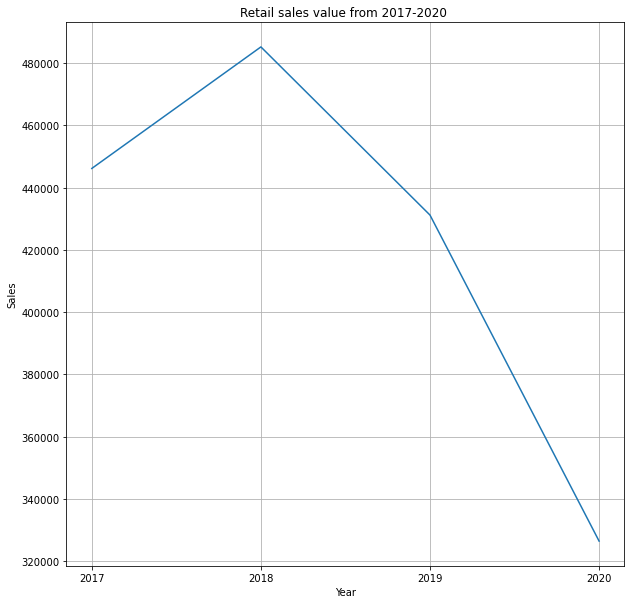

In [18]:
plt.figure(figsize=(10,10))
year = totalretailsales["CCYY"].tail(4)
vl = totalretailsales["STAT_VALUE"].tail(4)
plt.plot(year,vl)
plt.title('Retail sales value from 2017-2020 ')
plt.ylabel('Sales')
plt.xlabel('Year')
plt.grid(True)
plt.xticks(year)
plt.show()

For the above sales, we able to see the total sales are decrease since 2018, and we should make a fruther investagtaion about which trade cost to such change.

For the dataframe first i filter value by different year.

In [19]:
in18retailsales = data.loc[(data['CCYY']== 2018) & (data['Trade name']!= 'ALL') ]

in19retailsales = data.loc[(data['CCYY']== 2019) & (data['Trade name']!= 'ALL') ]

in20retailsales = data.loc[(data['CCYY']== 2020) & (data['Trade name']!= 'ALL') ]


In [20]:
in18retail = in18retailsales.groupby(['Trade name','CCYY'])['STAT_VALUE'].agg('sum').reset_index()
in18retail
in19retail = in19retailsales.groupby(['Trade name','CCYY'])['STAT_VALUE'].agg('sum').reset_index()
in19retail
in20retail = in20retailsales.groupby(['Trade name','CCYY'])['STAT_VALUE'].agg('sum').reset_index()
in20retail

,Trade name,CCYY,STAT_VALUE
0,Clothing,2020,31537.0
1,Clothing_Footwear,2020,5028.0
2,Clothing_Wearing,2020,26511.0
3,Consumer durables,2020,57108.0
4,Consumer durables_eletrical goods nec,2020,35213.0
5,Consumer durables_furniture fixtures,2020,7343.0
6,Consumer durables_motor vehicles,2020,14551.0
7,Department stores,2020,35939.0
8,Food,2020,37391.0
9,Food_Alcohol,2020,1645.0


After we get the data by year and group by trade name, we able to merage the data see the change value by year.

In [21]:
in18retail = pd.merge(in18retail,in19retail[['Trade name','STAT_VALUE']],on='Trade name', how='left')
in18retail = pd.merge(in18retail,in20retail[['Trade name','STAT_VALUE']],on='Trade name', how='left')
in18retail

,Trade name,CCYY,STAT_VALUE_x,STAT_VALUE_y,STAT_VALUE
0,Clothing,2018,62305.0,53518.0,31537.0
1,Clothing_Footwear,2018,9418.0,8353.0,5028.0
2,Clothing_Wearing,2018,52886.0,45167.0,26511.0
3,Consumer durables,2018,72268.0,63562.0,57108.0
4,Consumer durables_eletrical goods nec,2018,47911.0,40442.0,35213.0
5,Consumer durables_furniture fixtures,2018,7544.0,7316.0,7343.0
6,Consumer durables_motor vehicles,2018,16812.0,15803.0,14551.0
7,Department stores,2018,53257.0,46353.0,35939.0
8,Food,2018,44318.0,42832.0,37391.0
9,Food_Alcohol,2018,5787.0,5179.0,1645.0


In [22]:
in18retail.rename(columns={'STAT_VALUE_x':'2018',
                          'STAT_VALUE_y':'2019',
                          'STAT_VALUE':'2020'}, 
                 inplace=True)


Also we can see the trend the make a ranking list.

In [23]:
in18retail['2019trend'] = in18retail['2019'] - in18retail['2018']
in18retail['2020trend'] = in18retail['2020'] - in18retail['2019']

in18retail

,Trade name,CCYY,2018,2019,2020,2019trend,2020trend
0,Clothing,2018,62305.0,53518.0,31537.0,-8787.0,-21981.0
1,Clothing_Footwear,2018,9418.0,8353.0,5028.0,-1065.0,-3325.0
2,Clothing_Wearing,2018,52886.0,45167.0,26511.0,-7719.0,-18656.0
3,Consumer durables,2018,72268.0,63562.0,57108.0,-8706.0,-6454.0
4,Consumer durables_eletrical goods nec,2018,47911.0,40442.0,35213.0,-7469.0,-5229.0
5,Consumer durables_furniture fixtures,2018,7544.0,7316.0,7343.0,-228.0,27.0
6,Consumer durables_motor vehicles,2018,16812.0,15803.0,14551.0,-1009.0,-1252.0
7,Department stores,2018,53257.0,46353.0,35939.0,-6904.0,-10414.0
8,Food,2018,44318.0,42832.0,37391.0,-1486.0,-5441.0
9,Food_Alcohol,2018,5787.0,5179.0,1645.0,-608.0,-3534.0


After we found top five 2018 to 2019 trade that top 5 decrease list, we able to know which trade lead to the totail sales decreas the most.


In [24]:
in18retail2 = in18retail.nsmallest(5, '2019trend',)
in18retail2 = in18retail2.drop(columns=['CCYY', '2019trend','2020trend','2020'])

In [25]:
in18retail2 = in18retail2.set_index('Trade name').T
in18retail2

Trade name,Jewellery,Others,Clothing,Consumer durables,Clothing_Wearing
2018,85329.0,104661.0,62305.0,72268.0,52886.0
2019,66209.0,94996.0,53518.0,63562.0,45167.0


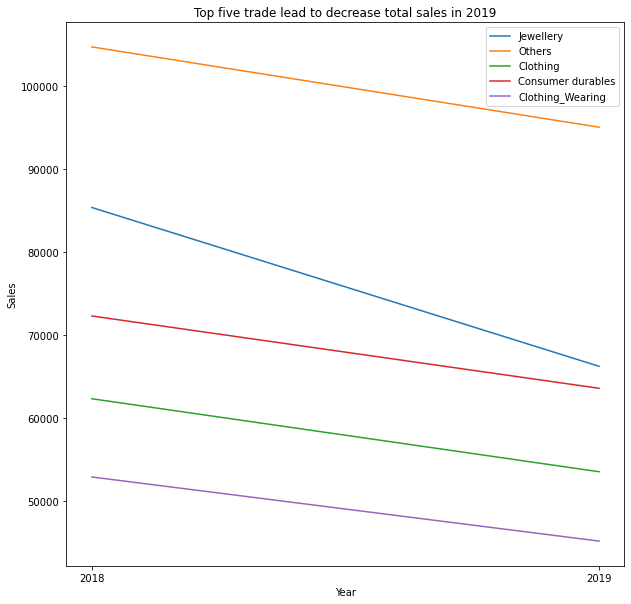

In [26]:

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(in18retail2.index, in18retail2['Jewellery'], label='Jewellery')
ax.plot(in18retail2.index, in18retail2['Others'], label='Others')
ax.plot(in18retail2.index, in18retail2['Clothing'], label='Clothing')
ax.plot(in18retail2.index, in18retail2['Consumer durables'], label='Consumer durables')
ax.plot(in18retail2.index, in18retail2['Clothing_Wearing'], label='Clothing_Wearing')
ax.legend()

plt.title('Top five trade lead to decrease total sales in 2019')
plt.ylabel('Sales')
plt.xlabel('Year')


plt.show()


From 2018 - 2019,
For the above line chart we can see the top five list of decrease total, 2 of it is luxury goods, also clothing and clothing wearing are also decrease.
In my opinion, In the market trend, we can assume the part of luxury clothing and clothing wearing decrease contributed the decrease of the clothing trade.

In [27]:
in18retail3 = in18retail.nsmallest(5, '2020trend',)
in18retail3 = in18retail3.drop(columns=['CCYY', '2019trend','2020trend','2018'])
in18retail3

,Trade name,2019,2020
15,Jewellery,66209.0,30456.0
16,Others,94996.0,65409.0
0,Clothing,53518.0,31537.0
19,Others_MC,43003.0,21511.0
2,Clothing_Wearing,45167.0,26511.0


In [28]:
in18retail3 = in18retail3.set_index('Trade name').T
in18retail3

Trade name,Jewellery,Others,Clothing,Others_MC,Clothing_Wearing
2019,66209.0,94996.0,53518.0,43003.0,45167.0
2020,30456.0,65409.0,31537.0,21511.0,26511.0


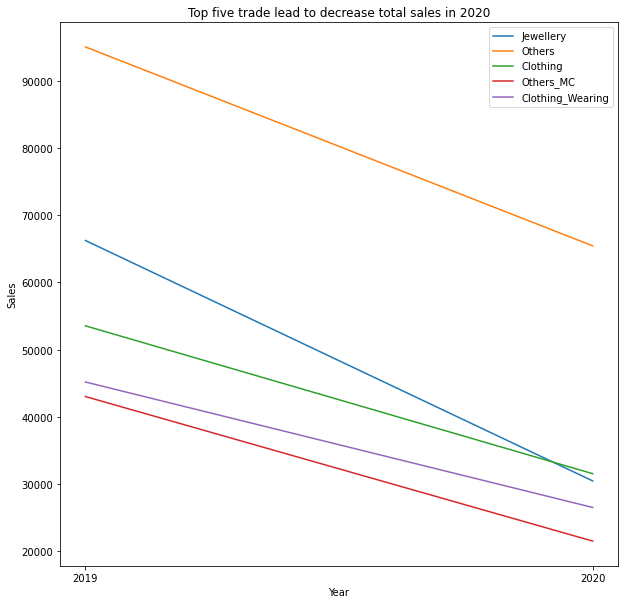

In [29]:

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(in18retail3.index, in18retail3['Jewellery'], label='Jewellery')
ax.plot(in18retail3.index, in18retail3['Others'], label='Others')
ax.plot(in18retail3.index, in18retail3['Clothing'], label='Clothing')
ax.plot(in18retail3.index, in18retail3['Others_MC'], label='Others_MC')
ax.plot(in18retail3.index, in18retail3['Clothing_Wearing'], label='Clothing_Wearing')
ax.legend()

plt.title('Top five trade lead to decrease total sales in 2020')
plt.ylabel('Sales')
plt.xlabel('Year')


plt.show()

From 2019 - 2020,
For the above line chart we can see the top five list of decrease total, 2 of it is luxury goods, also clothing and clothing wearing are also decrease.
And is prettey same as last year trend, we can see the luxury goods demend are lower, then cost the sales lower.

Beside decrease total, we can see the top 5 trend of largest increse sales contributed in market.

In [30]:
in18retail4 = in18retail.nlargest(5, '2020trend')
in18retail4 = in18retail4.drop(columns=['CCYY', '2019trend','2020trend'])
in18retail4

,Trade name,2018,2019,2020
22,SM & SDS,59446.0,59367.0,66112.0
23,Supermarkets,52971.0,53325.0,58494.0
11,Food_Livestock,11332.0,11729.0,13240.0
10,Food_Fruits,2693.0,2921.0,3417.0
5,Consumer durables_furniture fixtures,7544.0,7316.0,7343.0


In [31]:
in18retail4 = in18retail4.set_index('Trade name').T
in18retail4

Trade name,SM & SDS,Supermarkets,Food_Livestock,Food_Fruits,Consumer durables_furniture fixtures
2018,59446.0,52971.0,11332.0,2693.0,7544.0
2019,59367.0,53325.0,11729.0,2921.0,7316.0
2020,66112.0,58494.0,13240.0,3417.0,7343.0


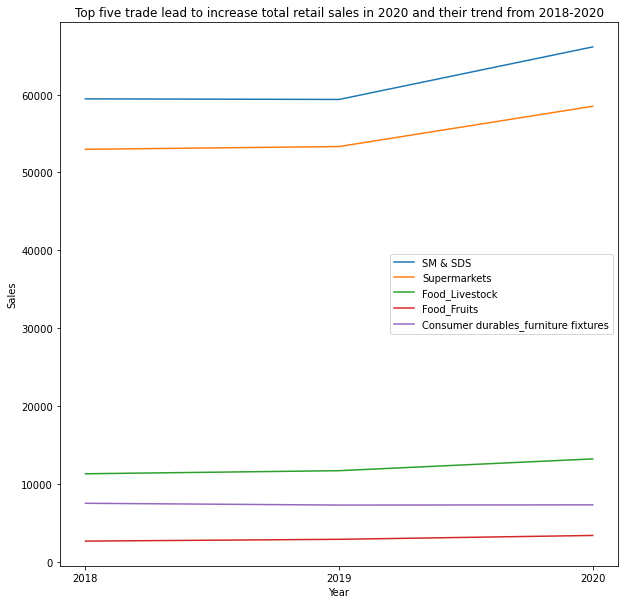

In [32]:

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(in18retail4.index, in18retail4.iloc[:, [0]], label='SM & SDS')
ax.plot(in18retail4.index, in18retail4.iloc[:, [1]], label='Supermarkets')
ax.plot(in18retail4.index, in18retail4.iloc[:, [2]], label='Food_Livestock')
ax.plot(in18retail4.index, in18retail4.iloc[:, [3]], label='Food_Fruits')
ax.plot(in18retail4.index, in18retail4.iloc[:, [4]], label='Consumer durables_furniture fixtures')



ax.legend()

plt.title('Top five trade lead to increase total retail sales in 2020 and their trend from 2018-2020')
plt.ylabel('Sales')
plt.xlabel('Year')


plt.show()

Also, the trend of increase top 4 is necessity goods, but the increase vaules are not that high as the luxury goods before 2018.
Its show that since 201,  even the market trend are decrasing, necessity goods wont be afftected that much, and there's is a  incerease case.

After that,Lets use the YOY method to see the decrease trend.

In [33]:
in18retail

,Trade name,CCYY,2018,2019,2020,2019trend,2020trend
0,Clothing,2018,62305.0,53518.0,31537.0,-8787.0,-21981.0
1,Clothing_Footwear,2018,9418.0,8353.0,5028.0,-1065.0,-3325.0
2,Clothing_Wearing,2018,52886.0,45167.0,26511.0,-7719.0,-18656.0
3,Consumer durables,2018,72268.0,63562.0,57108.0,-8706.0,-6454.0
4,Consumer durables_eletrical goods nec,2018,47911.0,40442.0,35213.0,-7469.0,-5229.0
5,Consumer durables_furniture fixtures,2018,7544.0,7316.0,7343.0,-228.0,27.0
6,Consumer durables_motor vehicles,2018,16812.0,15803.0,14551.0,-1009.0,-1252.0
7,Department stores,2018,53257.0,46353.0,35939.0,-6904.0,-10414.0
8,Food,2018,44318.0,42832.0,37391.0,-1486.0,-5441.0
9,Food_Alcohol,2018,5787.0,5179.0,1645.0,-608.0,-3534.0


In [34]:
in18retail['2020pct'] = (in18retail['2020']-in18retail['2019'])/in18retail['2019']*100
in18retail

,Trade name,CCYY,2018,2019,2020,2019trend,2020trend,2020pct
0,Clothing,2018,62305.0,53518.0,31537.0,-8787.0,-21981.0,-41.072163
1,Clothing_Footwear,2018,9418.0,8353.0,5028.0,-1065.0,-3325.0,-39.806058
2,Clothing_Wearing,2018,52886.0,45167.0,26511.0,-7719.0,-18656.0,-41.304492
3,Consumer durables,2018,72268.0,63562.0,57108.0,-8706.0,-6454.0,-10.153866
4,Consumer durables_eletrical goods nec,2018,47911.0,40442.0,35213.0,-7469.0,-5229.0,-12.929628
5,Consumer durables_furniture fixtures,2018,7544.0,7316.0,7343.0,-228.0,27.0,0.369054
6,Consumer durables_motor vehicles,2018,16812.0,15803.0,14551.0,-1009.0,-1252.0,-7.922546
7,Department stores,2018,53257.0,46353.0,35939.0,-6904.0,-10414.0,-22.466723
8,Food,2018,44318.0,42832.0,37391.0,-1486.0,-5441.0,-12.703119
9,Food_Alcohol,2018,5787.0,5179.0,1645.0,-608.0,-3534.0,-68.237111


In [35]:
in18retail5 = in18retail.nsmallest(5, '2020pct')
in18retail5 = in18retail5.drop(columns=['CCYY', '2019trend','2020trend','2018','2019','2020'])
in18retail5


,Trade name,2020pct
9,Food_Alcohol,-68.237111
15,Jewellery,-54.000211
19,Others_MC,-49.977909
2,Clothing_Wearing,-41.304492
0,Clothing,-41.072163


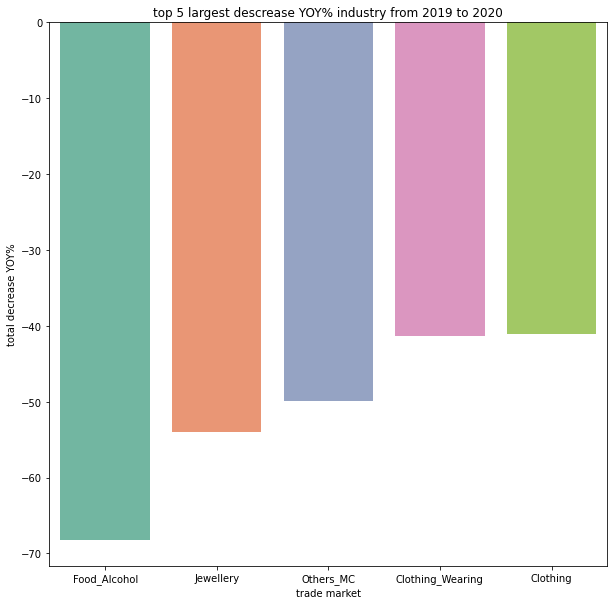

In [36]:
%matplotlib inline 
plt.figure(figsize=(10,10))
labels = in18retail5['Trade name']
values = in18retail5['2020pct']

sns.barplot(x = labels,y = values, palette='Set2')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('total decrease YOY%')
plt.xlabel('trade market')
plt.title("top 5 largest descrease YOY% industry from 2019 to 2020")
plt.show()

The above histogram show that the YOY decrease highest is Food Alcohol, but its does not contribute too much for the market decreasing trend, since the sales drop only -3534, but still is largest decrease. But we can see how the market trend decrease and mostly is luxury goods, like the top 5 variable.


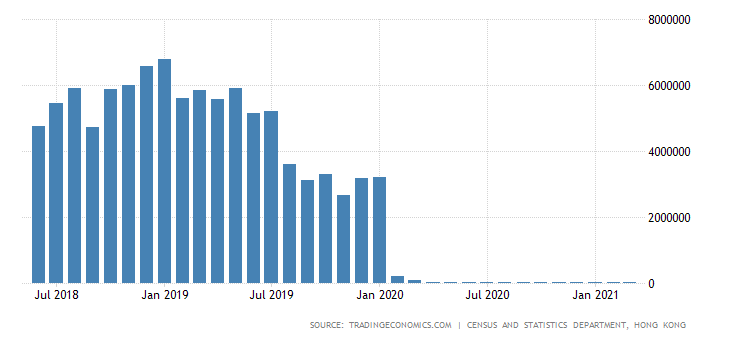

In [37]:
from IPython.display import Image
# Load image from local storage
Image(filename = "C:/Users/85260/Desktop/hong-kong-tourist-arrivals.png", width = 600, height = 300)


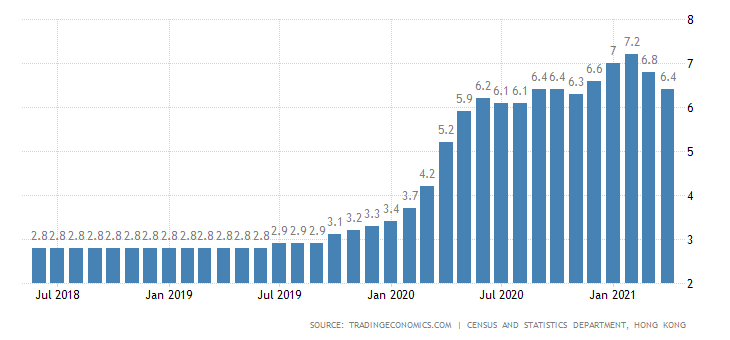

In [38]:
from IPython.display import Image
# Load image from local storage

Image(filename = "C:/Users/85260/Desktop/hong-kong-unemployment-rate.png", width = 600, height = 300)

Hong Kong Visitor Arrivals Histogram 

## Conclusion
For the analysis, the main purpose is base on the past data to predict what will happened in the future
retail sales market. We all know from 2019–2020 there is Hong Kong protests and COVID-19, which lead the visitor arrivals decrease, which decrease the part of retail buying in luxury goods by vistior, And COVID-19 still not been solve by now.
Also the unemployment rate getting higher, local people may not have a good expection for the future, which lead local people tend to save my money rather the buy luxury goods. Its also part of the reason why lead the retail selling in luxury goods trade decrease.
I think in the near future, there's is no way to gain more visitor arrivals. There's is little chance for the luxury bussines for getting increase in trade. But the necessity goods will still remain the same amount. Since there still has many non-retail bussiness running in Hong Kong.

For a mall-running enterprise, I think the main purpose is increasing more shoppers and lead to increase sales in the mall. And for gaining and increase more competitive mall rental revenue. Mall-running enterprise should be considered for rental for retail business major focus on necessity goods like largest supermarket, food retail, SM & SDS etc. Which increase the scale of shoppers and the sales by shoppers from the mall. Which can lead the mall performacne better and increase more competitive mall rental revenue.